# Using SaLIB package for sobol analysis 

Tutorial from https://salib.readthedocs.io/en/latest/user_guide/basics.html

In [10]:
import SALib as salib
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [2]:
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

In [8]:
param_values = saltelli.sample(problem, 1024)

C:\Users\goura\AppData\Local\Temp\ipykernel_25540\1862108280.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


In [9]:
Y = Ishigami.evaluate(param_values)

In [11]:
Si = sobol.analyze(problem, Y)

c:\Users\goura\anaconda3\envs\botorch\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [13]:
print(Si['S1'])

[0.31683154 0.44376306 0.01220312]


In [14]:
print(Si['ST'])

[0.55586009 0.44189807 0.24467539]


In [15]:
total_Si, first_Si, second_Si = Si.to_df()

In [16]:
total_Si

,ST,ST_conf
x1,0.555860,0.091870
x2,0.441898,0.043159
x3,0.244675,0.026650


c:\Users\goura\anaconda3\envs\botorch\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

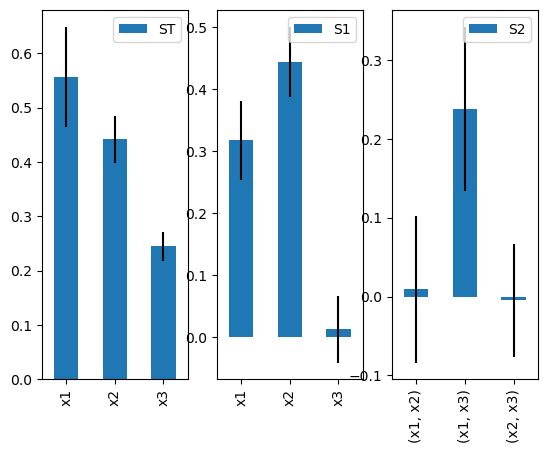

In [17]:
Si.plot()